## Create database from gff3 files 

Only needs to be done once

In [1]:
# Import gffutils, which is installed in home directory
import gffutils

# Creates a SQL3 database from the annotation file. THIS COMMAND ONLY NEEDS TO BE RUN ONCE. 
# Metr_db = gffutils.create_db("../../data-clean/020_exonerate_p2g/Medicago-truncatula/Nagy_transcriptome_p2g.gff3", 
#                              dbfn='../../data-clean/020_exonerate_p2g/Medicago-truncatula/Nagy_transcriptome_p2g.db', 
#                              force=True, keep_order=True, merge_strategy='merge', sort_attribute_values=True)

# Trpr_db = gffutils.create_db("../../data-clean/020_exonerate_p2g/Trifolium-pratense//Nagy_transcriptome_p2g.gff3", 
#                              dbfn='../../data-clean/020_exonerate_p2g/Trifolium-pratense/Nagy_transcriptome_p2g.db', 
#                              force=True, keep_order=True, merge_strategy='merge', sort_attribute_values=True)

# Trsu_db = gffutils.create_db("../../data-clean/020_exonerate_p2g/Trifolium-subterraneum//Nagy_transcriptome_p2g.gff3", 
#                              dbfn='../../data-clean/020_exonerate_p2g/Trifolium-subterraneum/Nagy_transcriptome_p2g.db', 
#                              force=True, keep_order=True, merge_strategy='merge', sort_attribute_values=True)

## Load in the databases

In [29]:
# Load the database created above
Metr_db = gffutils.FeatureDB("../../data-clean/030_exonerate_p2g/Medicago-truncatula/Nagy_transcriptome_p2g.db")
Trpr_db = gffutils.FeatureDB("../../data-clean/030_exonerate_p2g/Trifolium-pratense/Nagy_transcriptome_p2g.db")
Trsu_db = gffutils.FeatureDB("../../data-clean/030_exonerate_p2g/Trifolium-subterraneum/Nagy_transcriptome_p2g.db")

## Define useful functions used throughout notebook

In [37]:
def count_features(gff3_database):
    """Returns count of all features in gff3 database as dictionary"""

    features = {}
    for feature in gff3_database.featuretypes():
        features[feature] = gff3_database.count_features_of_type(feature)
    return features

def unique_gff3_gene_ids(gff3_database):
    """Returns list of unique ids in gff3 database"""

    unique_ids = []
    for feature in gff3_database.features_of_type("gene"):
        if not any([x in feature.id for x in unique_ids]):
            unique_ids.append(feature.id)
    return(unique_ids)

def cds_length(IDs, gff3_database):
    """Returns a list with the length of each coding sequence in the gff3"""
    
    cds_lengths = []
    for unique_id in IDs:
        for child in gff3_database.children(unique_id, featuretype = "cds"):
            cds_lengths.append(child.end - child.start)
    return(cds_lengths)

## Create unique id lists for reference species and plot cds size distribution

### _Trifolium subterraneum_

In [31]:
Trsu_unique_ids = unique_gff3_gene_ids(Trsu_db)

In [45]:
print "There are", len(Trsu_unique_ids), "unique gene ids in the T. subterraneum gff3 file"

There are 13059 unique gene ids in the T. subterraneum gff3 file


In [39]:
Trsu_cds_length = cds_length(Trsu_unique_ids, Trsu_db)

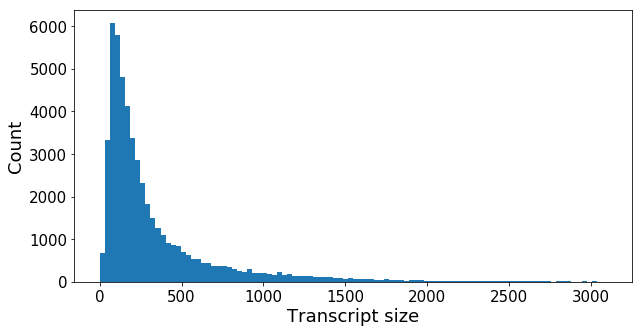

In [43]:
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))
plt.hist(Trsu_cds_length, bins = 100, range = (0, 3100))
plt.xlabel("Transcript size", size = 18)
plt.ylabel("Count", size = 18)
plt.tick_params(labelsize=15)
plt.show()

In [46]:
Trsu_count_bt_200_800 = 0
for length in Trsu_cds_length:
    if length >= 200 and length <= 800:
        Trsu_count_bt_200_800 += 1
        
print "There are",  Trsu_count_bt_200_800, "coding sequences between 200 and 800 bp in length"       

There are 20064 coding sequences between 200 and 800 bp in length


### _Trifolium pratense_

In [47]:
Trpr_unique_ids = unique_gff3_gene_ids(Trpr_db)

In [48]:
print "There are", len(Trpr_unique_ids), "unique gene ids in the T. pratense gff3 file"

There are 10618 unique gene ids in the T. pratense gff3 file


In [49]:
Trpr_cds_length = cds_length(Trpr_unique_ids, Trpr_db)

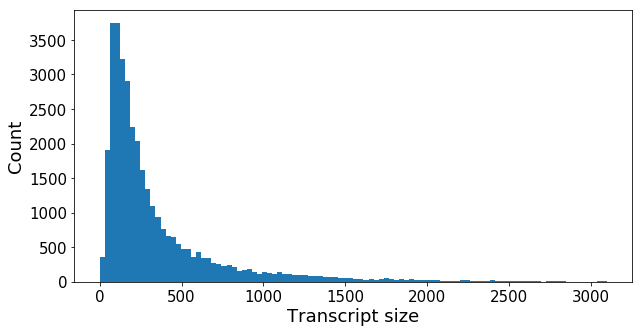

In [51]:
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))
plt.hist(Trpr_cds_length, bins = 100, range = (0, 3100))
plt.xlabel("Transcript size", size = 18)
plt.ylabel("Count", size = 18)
plt.tick_params(labelsize=15)
plt.show()

In [52]:
Trpr_count_bt_200_800 = 0
for length in Trpr_cds_length:
    if length >= 200 and length <= 800:
        Trpr_count_bt_200_800 += 1
        
print "There are",  Trpr_count_bt_200_800, "coding sequences between 200 and 800 bp in length"       

There are 14288 coding sequences between 200 and 800 bp in length


### _Medicago truncatula_

In [53]:
Metr_unique_ids = unique_gff3_gene_ids(Metr_db)

In [55]:
print "There are", len(Metr_unique_ids), "unique gene ids in the M. truncatula gff3 file"

There are 17007 unique gene ids in the M. truncatula gff3 file


In [56]:
Metr_cds_length = cds_length(Metr_unique_ids, Metr_db)

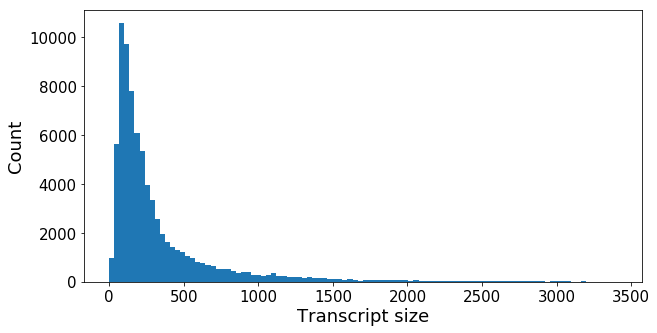

In [58]:
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))
plt.hist(Metr_cds_length, bins = 100, range = (0, 3400))
plt.xlabel("Transcript size", size = 18)
plt.ylabel("Count", size = 18)
plt.tick_params(labelsize=15)
plt.show()

In [59]:
Metr_count_bt_200_800 = 0
for length in Metr_cds_length:
    if length >= 200 and length <= 800:
        Metr_count_bt_200_800 += 1
        
print "There are",  Metr_count_bt_200_800, "coding sequences between 200 and 800 bp in length"       

There are 29766 coding sequences between 200 and 800 bp in length


In [33]:
id_count = 0
for feature in Trsu_db.features_of_type("gene"):
    id_count += 1
    
id_count

33290

In [62]:
cds_200to800 = 0
total_length = 0
# parent_genes = []
for feature in Metr_db.features_of_type("cds"):
    length = feature.end - feature.start
    if length >= 200 and length <= 800:
        cds_200to800 += 1
        total_length += float(length) / (10**6)
#         if feature.attributes['Parent'][0] not in parent_genes:
#             parent_genes.append(feature.attributes['Parent'][0])

print(cds_200to800, total_length)

(64961, 24.338649000000068)


In [107]:
import pandas as pd

Metr_hits = pd.read_csv('../../data-clean/010_blastx/Medicago-truncatula/Nagy_transcriptome_ProteinBlast_Filtered.csv', 
                       usecols = ['qseqid'])
Metr_hits.to_csv('../../data-clean/010_blastx/Medicago-truncatula/Nagy_transcriptome_ProteinBlast_Qseqids.txt', 
                 index=False, sep=' ', header=None)

Trpr_hits = pd.read_csv('../../data-clean/010_blastx/Trifolium-pratense/Nagy_transcriptome_ProteinBlast_Filtered.csv', 
                       usecols = ['qseqid'])
Trpr_hits.to_csv('../../data-clean/010_blastx/Trifolium-pratense/Nagy_transcriptome_ProteinBlast_Qseqids.txt', 
                 index=False, sep=' ', header=None)

Trsu_hits = pd.read_csv('../../data-clean/010_blastx/Trifolium-subterraneum/Nagy_transcriptome_ProteinBlast_Filtered.csv', 
                       usecols = ['qseqid'])
Trsu_hits.to_csv('../../data-clean/010_blastx/Trifolium-subterraneum/Nagy_transcriptome_ProteinBlast_Qseqids.txt', 
                 index=False, sep=' ', header=None)

Trre_hits = pd.read_csv('../../data-clean/010_blastx/Trifolium-repens/Nagy_transcriptome_ProteinBlast_Filtered.csv', 
                       usecols = ['qseqid'])
Trre_hits.to_csv('../../data-clean/010_blastx/Trifolium-repens/Nagy_transcriptome_ProteinBlast_Qseqids.txt', 
                 index=False, sep=' ', header=None)

In [80]:
Metr_set = set(Metr_hits['qseqid'])
Trpr_set = set(Trpr_hits['qseqid'])
Trsu_set = set(Trsu_hits['qseqid'])

In [84]:
len(Metr_set.intersection(Trpr_set, Trsu_set))

43826

In [98]:
def remove_union(**kwargs):
       
#     print(kwargs.values())

    intersection = kwargs.values()[0].intersection(*kwargs.values()[1:])
    
    return(len(intersection))


remove_union(Metr = Metr_set, Trpr = Trpr_set, Trsu = Trsu_set)  
    

43826